# <span style="color:purple"> Mapped Burden & Forcing Climatologies

### <span style="color:purple"> Imports

In [20]:
# Third-party libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs as ccrs, feature as cfeature

# Custom utilities
import utils
from utils.load_variable import load_variables_for_all_years

### <span style="color:purple"> Loading SO4 Burden & RRTMG Variables

In [49]:
BURDENSO4   = load_variables_for_all_years('h3', 'BURDENSO4dn')   # kg m-2
Base = load_variables_for_all_years('h0', 'FSNTOA') # W m-2
Clean = load_variables_for_all_years('h0', 'FSNTOA_d2') # W m-2
Clear = load_variables_for_all_years('h0', 'FSNTOAC') # W m-2
Clean_Clear = load_variables_for_all_years('h0', 'FSNTOAC_d2') # W m-2

### <span style="color:purple"> Calculating Monthly Climatologies

In [50]:
BURDENSO4_monthly = (np.log10(BURDENSO4['2006']) - np.log10(BURDENSO4['1970'])).groupby('time.month').mean().roll(month=-1)

direct_monthly = ((Base['2006'] - Clean['2006']) - (Base['1970'] - Clean['1970'])).groupby('time.month').mean().roll(month=-1)

cloud_monthly = ((Clean['2006'] - Clean_Clear['2006'])- (Clean['1970'] - Clean_Clear['2006'])).groupby('time.month').mean().roll(month=-1)


### <span style="color:purple"> Grouping Monthly Climatologies to Max, Min, and Difference in Months

In [51]:
def get_months(dataset, month_list_a, month_list_b):
    dataset_a = dataset.sel(month=month_list_a).mean('month')
    dataset_b = dataset.sel(month=month_list_b).mean('month')
    diff = dataset_a - dataset_b
    return dataset_a, dataset_b, diff


peak_months = [4, 5, 6]
min_months = [11, 12, 1]

BURDENSO4_max, BURDENSO4_min, diff_BURDENSO4 = get_months(BURDENSO4_monthly, peak_months, min_months)

direct_max, direct_min, diff_direct = get_months(direct_monthly, peak_months, min_months)

cloud_max, cloud_min, diff_cloud = get_months(cloud_monthly, peak_months, min_months)

### <span style="color:purple"> Plotting  Monthly Climatologies of Max, Min, and Difference in Months

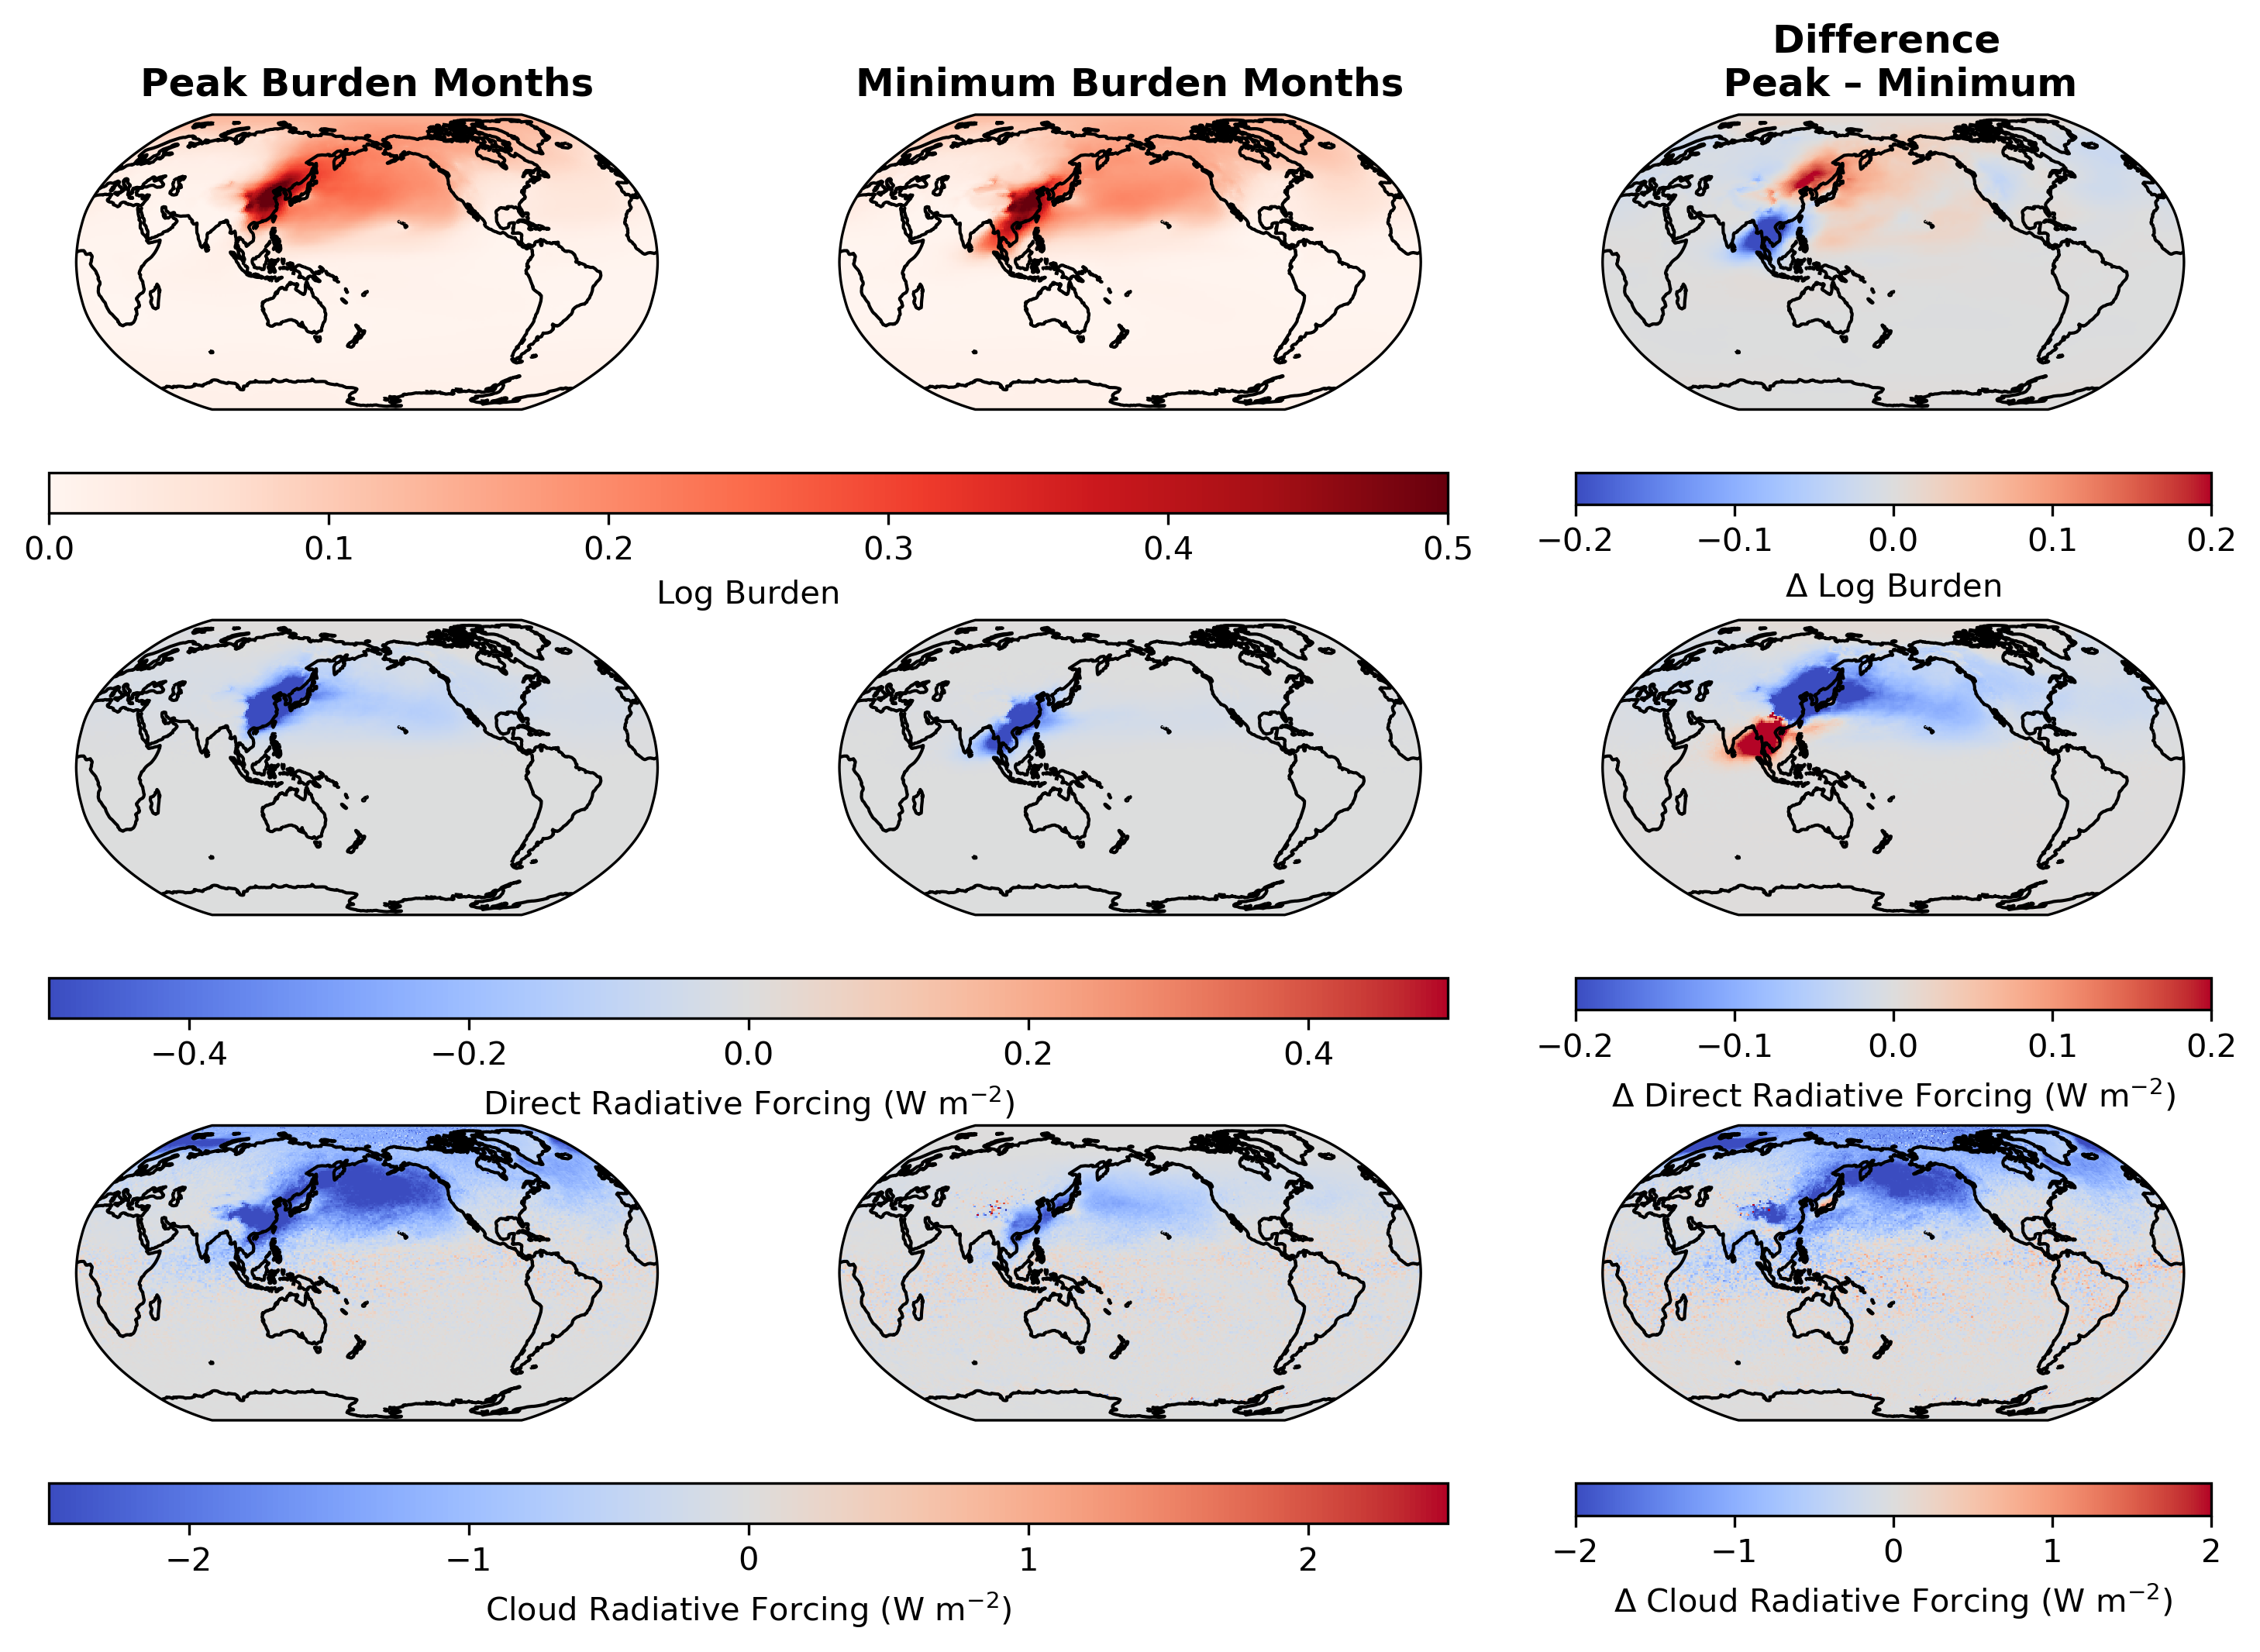

In [55]:
lon = xr.open_dataarray('/glade/derecho/scratch/jzweifel/Regional_Masks_And_Area/dimension_files/model_dims/lon.nc')
lat = xr.open_dataarray('/glade/derecho/scratch/jzweifel/Regional_Masks_And_Area/dimension_files/model_dims/lat.nc')

fig, axs = plt.subplots(3, 3, figsize=(12, 8), subplot_kw={'projection': ccrs.Robinson(central_longitude=180)}, dpi=300)
axs = axs.flatten()

# Plotting
m0 = axs[0].pcolormesh(lon, lat, BURDENSO4_max, transform=ccrs.PlateCarree(), vmin=0, vmax=0.5, cmap='Reds')
m1 = axs[1].pcolormesh(lon, lat, BURDENSO4_min, transform=ccrs.PlateCarree(), vmin=0, vmax=0.5, cmap='Reds')
m2 = axs[2].pcolormesh(lon, lat, diff_BURDENSO4, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='coolwarm')

m3 = axs[3].pcolormesh(lon, lat, direct_max, transform=ccrs.PlateCarree(), vmin=-0.5, vmax=0.5, cmap='coolwarm')
m4 = axs[4].pcolormesh(lon, lat, direct_min, transform=ccrs.PlateCarree(), vmin=-0.5, vmax=0.5, cmap='coolwarm')
m5 = axs[5].pcolormesh(lon, lat, diff_direct, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='coolwarm')

m6 = axs[6].pcolormesh(lon, lat, cloud_max, transform=ccrs.PlateCarree(), vmin=-2.5, vmax=2.5, cmap='coolwarm')
m7 = axs[7].pcolormesh(lon, lat, cloud_min, transform=ccrs.PlateCarree(), vmin=-2.5, vmax=2.5, cmap='coolwarm')
m8 = axs[8].pcolormesh(lon, lat, diff_cloud, transform=ccrs.PlateCarree(), vmin=-2.0, vmax=2.0, cmap='coolwarm')

# Add coastlines
for ax in axs:
    ax.add_feature(cfeature.COASTLINE)

# Column titles
axs[0].set_title("Peak Burden Months", fontsize=12, weight='bold')
axs[1].set_title("Minimum Burden Months", fontsize=12, weight='bold')
axs[2].set_title("Difference \n Peak – Minimum", fontsize=12, weight='bold')

# Colorbars
fig.colorbar(m0, aspect=35, pad=0.15, ax=[axs[0], axs[1]], orientation='horizontal', label='Log Burden')
fig.colorbar(m2, pad=0.15, ax=[axs[2]], orientation='horizontal',label='$\Delta$ Log Burden')

fig.colorbar(m3, aspect=35, pad=0.15, ax=[axs[3], axs[4]], orientation='horizontal', label='Direct Radiative Forcing (W m$^{-2}$)')
fig.colorbar(m5, pad=0.15, ax=[axs[5]], orientation='horizontal', label='$\Delta$ Direct Radiative Forcing (W m$^{-2}$)')

fig.colorbar(m6, aspect=35, pad=0.15, ax=[axs[6], axs[7]], orientation='horizontal', label='Cloud Radiative Forcing (W m$^{-2}$)')
fig.colorbar(m8, pad=0.15, ax=[axs[8]], orientation='horizontal', label='$\Delta$ Cloud Radiative Forcing (W m$^{-2}$)')

plt.show()